In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_excel("C:/Users/Sandhya K/OneDrive/loan_prediction_666.xlsx")

In [4]:
df.head(10)

,age,income,credit_score,loan_amount,gender,date,education_level,interest_rate,region,loan_term,loan_purpose,loan_approved,loan_status,martial_status
0,54,100000.0,334,19713.189940,Male,2025-03-25,Postgraduate,0.10,Urban,36,Personal,0,Short term,Married
1,43,100000.0,823,70593.628810,Male,2025-05-05,Graduate,0.10,Urban,60,Business,1,Long term,Married
2,34,100000.0,342,16429.001880,Male,2025-10-05,High School,0.10,Urban,36,Personal,0,Short term,Married
3,61,100000.0,584,19290.629160,Male,2025-06-27,High School,0.10,Urban,36,Personal,0,Short term,Married
4,30,100000.0,320,15253.938760,Male,2025-06-23,Graduate,0.10,Urban,36,Personal,0,Short term,Married
5,46,100000.0,516,7677.345480,Male,2025-06-27,Other,0.05,Urban,36,Personal,0,Short term,Married
6,40,100000.0,814,56806.506520,Female,2025-07-26,High School,0.10,Urban,60,Business,1,Long term,Married
7,58,100000.0,413,18948.782650,Male,2025-03-28,Other,0.10,Urban,36,Personal,0,Short term,Married
8,68,100000.0,644,37976.836280,Male,2024-12-14,Graduate,0.10,Urban,36,Business,1,Short term,Married
9,48,100000.0,487,6271.495324,Male,2025-10-13,Other,0.05,Urban,36,Personal,0,Short term,Married


In [5]:
df.head(2)

,age,income,credit_score,loan_amount,gender,date,education_level,interest_rate,region,loan_term,loan_purpose,loan_approved,loan_status,martial_status
0,54,100000.0,334,19713.18994,Male,2025-03-25,Postgraduate,0.1,Urban,36,Personal,0,Short term,Married
1,43,100000.0,823,70593.62881,Male,2025-05-05,Graduate,0.1,Urban,60,Business,1,Long term,Married


In [6]:
df.tail()

,age,income,credit_score,loan_amount,gender,date,education_level,interest_rate,region,loan_term,loan_purpose,loan_approved,loan_status,martial_status
995,68,18279.98,379,5661.404217,Female,2024-12-14,High School,0.05,Urban,36,Personal,0,Short term,Married
996,41,8244.06,653,31662.715330,Male,2025-02-13,Graduate,0.10,Rural,36,Business,1,Short term,Married
997,39,16194.69,460,12756.391530,Male,2025-01-17,High School,0.10,Urban,36,Personal,0,Short term,Married
998,52,38739.91,726,79773.362750,Female,2025-01-03,High School,0.10,Urban,60,Business,1,Long term,Married
999,24,11278.55,702,66426.620430,Male,2025-05-13,High School,0.10,Urban,60,Business,1,Long term,Single


In [7]:
df.shape

(1000, 14)

In [8]:
print("\n Dataset Info:")
print(df.info())

print("\n Summary statistics:")
print(df.describe())

print("\n Missing values:")
print(df.isnull().sum())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   age              1000 non-null   int64         
 1   income           1000 non-null   float64       
 2   credit_score     1000 non-null   int64         
 3   loan_amount      1000 non-null   float64       
 4   gender           1000 non-null   object        
 5   date             1000 non-null   datetime64[ns]
 6   education_level  1000 non-null   object        
 7   interest_rate    1000 non-null   float64       
 8   region           1000 non-null   object        
 9   loan_term        1000 non-null   int64         
 10  loan_purpose     1000 non-null   object        
 11  loan_approved    1000 non-null   int64         
 12  loan_status      1000 non-null   object        
 13  martial_status   1000 non-null   object        
dtypes: datetime64[ns](1), flo

# Descriptive statistics

In [9]:
# Assuming df is your dataframe
print(df[['income','loan_approved']].describe())

              income  loan_approved
count    1000.000000    1000.000000
mean    31943.240590       0.463000
std     28058.315386       0.498879
min      4000.000000       0.000000
25%     11057.325000       0.000000
50%     21712.035000       0.000000
75%     42369.575000       1.000000
max    100000.000000       1.000000


# Logistic regression model

In [10]:
# Assuming df is your DataFrame
X = df.drop(['loan_approved'], axis=1)  
y = df['loan_approved']  

# Preprocessing: Scale numerical features
numerical_cols = ['age', 'income', 'credit_score', 'loan_amount', 'interest_rate', 'loan_term']
categorical_cols = ['gender', 'education_level', 'region', 'loan_purpose', 'martial_status']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Logistic Regression with hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 2000]
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("ROC-AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.99      0.99      0.99        95

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Recall Score: 0.9894736842105263
Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
Accuracy: 0.99
F1 Score: 0.9894736842105263
Precision: 0.9894736842105263
ROC-AUC Score: 0.9996992481203008


C:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

# Random Forest

In [11]:
# Define column types
numerical_cols = ['age', 'income', 'credit_score', 'loan_amount', 'interest_rate', 'loan_term']
categorical_cols = ['gender', 'education_level', 'region', 'loan_purpose', 'martial_status']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest with hyperparameter tuning
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(preprocessor.fit_transform(X_train), y_train)

# Logistic Regression with hyperparameter tuning
param_grid_lr = {'classifier__C': [0.1, 1, 10]}
lr = LogisticRegression(random_state=42)
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lr)])
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

# Model evaluation for best models
for model, name in zip([grid_rf, grid_lr], ['Random Forest', 'Logistic Regression']):
    y_pred = model.predict(preprocessor.fit_transform(X_test) if name == 'Random Forest' else X_test)
    y_pred_proba = model.predict_proba(preprocessor.fit_transform(X_test) if name == 'Random Forest' else X_test)[:, 1]
    print("Classification Report:")
    print(classification_report(y_test, y_pred)) 
    print(f"{name} - Best Params: {model.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba)}")
    print()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        95

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Random Forest - Best Params: {'max_depth': 5, 'n_estimators': 100}
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
ROC-AUC: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.99      0.99      0.99        95

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Logistic Regression - Best Params: {'classifier__C': 10}
Accuracy: 0.99
F1 Score: 0.9894736842105263
Precision: 0.9894736842105263
ROC-AUC: 0.9997994987468671



# XGBoost

In [22]:
# Define column types
numerical_cols = ['age', 'income', 'credit_score', 'loan_amount', 'interest_rate']
categorical_cols = ['gender', 'education_level', 'region', 'loan_purpose','loan_term','loan_status', 'martial_status']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost with hyperparameter tuning
param_grid_xgb = {'classifier__learning_rate': [0.01, 0.1, 0.3], 
                  'classifier__max_depth': [3, 5, 7],
                  'classifier__n_estimators': [50, 100, 200]}
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', xgb)])
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5)
grid_xgb.fit(X_train, y_train)

# Model evaluation for XGBoost
y_pred_xgb = grid_xgb.predict(X_test)
y_pred_proba_xgb = grid_xgb.predict_proba(X_test)[:, 1]
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f"Best Params: {grid_xgb.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb)}")
print()

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.99      0.99        95

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Best Params: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Accuracy: 0.995
F1 Score: 0.9947089947089947
Precision: 1.0
ROC-AUC: 1.0



# Inferential statistics(chi-square test)

In [13]:
# Create contigency table
contigency_table = pd.crosstab(df['loan_status'], df['martial_status'])

In [14]:
# perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contigency_table)

In [15]:
print(f"chi-square value: {chi2}")
print(f"p-value: {p}")

chi-square value: 0.47337058048021835
p-value: 0.4914406169840111


In [16]:
#Interpretation

if p < 0.05:
    print("\nConclusion: Reject H0 - There is a statistically significant association between loan_status and martial_status.")
else:
    print("\nConclusion: Failed to Reject H0 - No significant association found.")


Conclusion: Failed to Reject H0 - No significant association found.


# VISUALIZATION

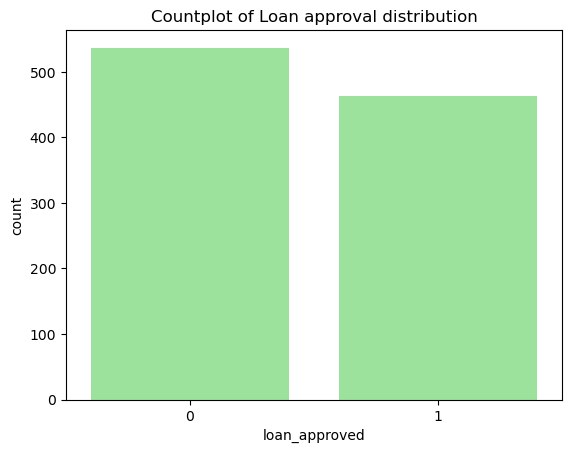

In [17]:
sns.countplot(x="loan_approved",data=df, color='lightgreen')
plt.title("Countplot of Loan approval distribution")
plt.show()

C:\Users\Sandhya K\AppData\Local\Temp\ipykernel_1284\1250867277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_binned', y='loan_approved',data=df, palette=['red','green','blue','yellow','purple'])


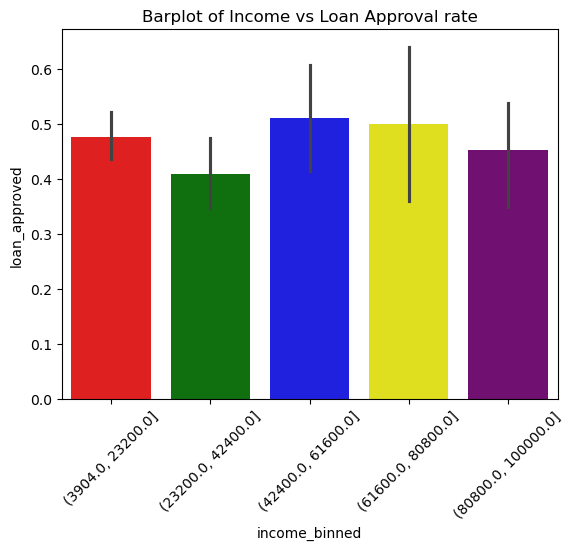

In [18]:
df['income_binned'] = pd.cut(df['income'], bins=5)
sns.barplot(x='income_binned', y='loan_approved',data=df, palette=['red','green','blue','yellow','purple'])
plt.title("Barplot of Income vs Loan Approval rate")
plt.xticks(rotation=45)
plt.show()

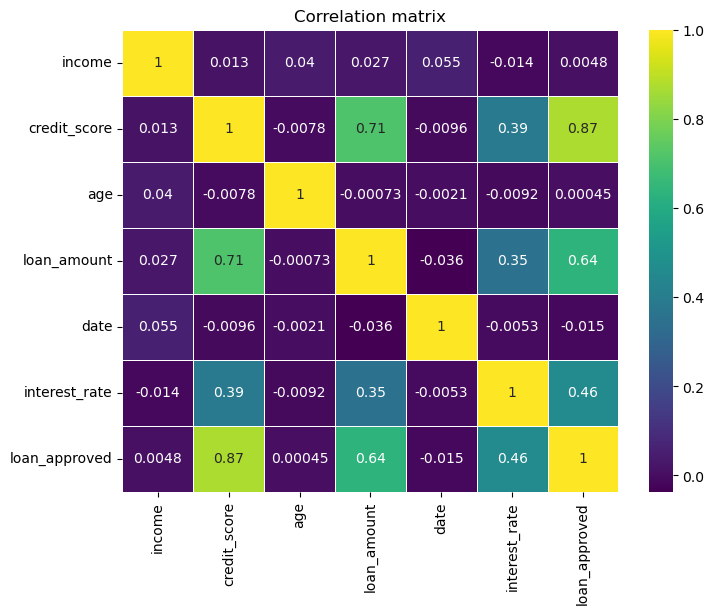

In [19]:
correlation_matrix = df[['income','credit_score','age','loan_amount','date','interest_rate','loan_approved']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

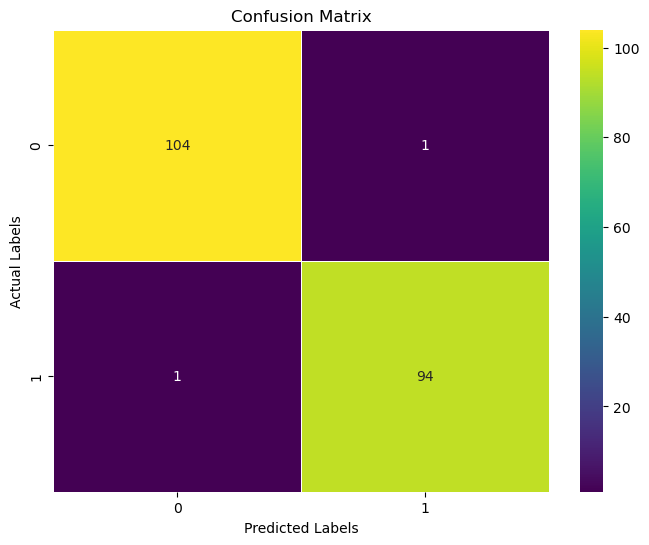

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', linewidths=0.5, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


========== Logistic Regression ==========
Confusion Matrix:
[[105   0]
 [  0  95]]
TN: 105, FP: 0, FN: 0, TP: 95


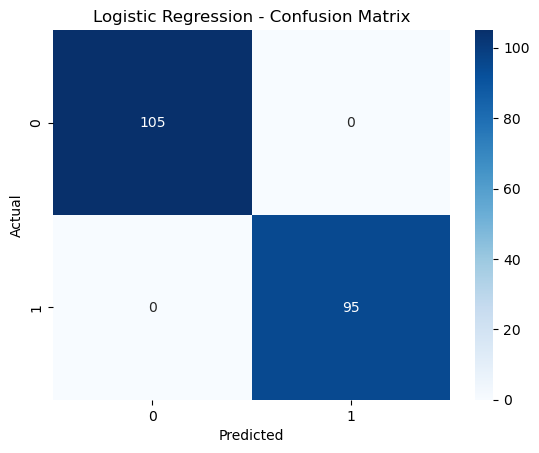


========== Random Forest ==========
Confusion Matrix:
[[105   0]
 [  0  95]]
TN: 105, FP: 0, FN: 0, TP: 95


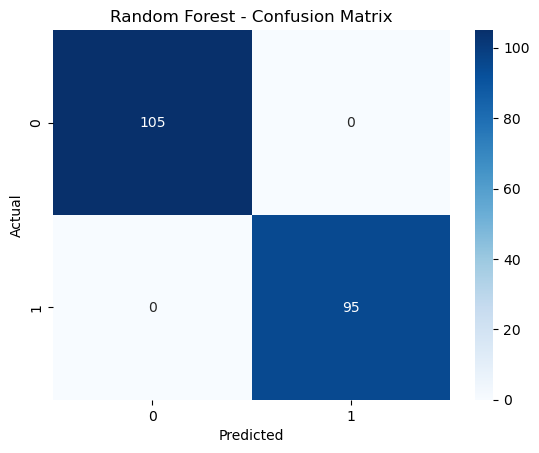

C:\Users\Sandhya K\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [00:23:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



========== XGBoost ==========
Confusion Matrix:
[[105   0]
 [  0  95]]
TN: 105, FP: 0, FN: 0, TP: 95


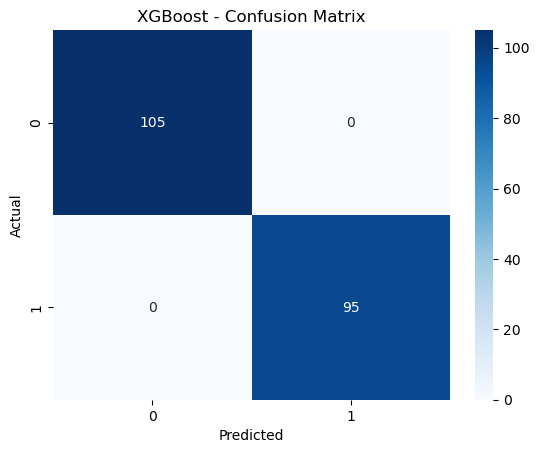

In [83]:
# ================================================
# FIX DATE COLUMN (convert timestamp → numeric)
# ================================================
df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df = df.drop(columns=["date"])  # Drop original datetime

# ================================================
# DEFINE X AND y
# ================================================
y = df["loan_approved"]  # target
X = df.drop(columns=["loan_approved"])  # features

# Categorical and numeric columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

# ================================================
# PREPROCESSOR (OneHot Encode categoricals)
# ================================================
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# ================================================
# HELPER: CONFUSION MATRIX PRINT + HEATMAP
# ================================================
def evaluate_confusion_matrix(model_name, y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    print(f"\n========== {model_name} ==========")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ================================================
# TRAIN / TEST SPLIT
# ================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================================
# 1. LOGISTIC REGRESSION
# ================================================
lr_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=2000))
])

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

evaluate_confusion_matrix("Logistic Regression", y_test, lr_pred)

# ================================================
# 2. RANDOM FOREST
# ================================================
rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

evaluate_confusion_matrix("Random Forest", y_test, rf_pred)

# ================================================
# 3. XGBOOST  (works now because date is numeric)
# ================================================
xgb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False
    ))
])

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

evaluate_confusion_matrix("XGBoost", y_test, xgb_pred)

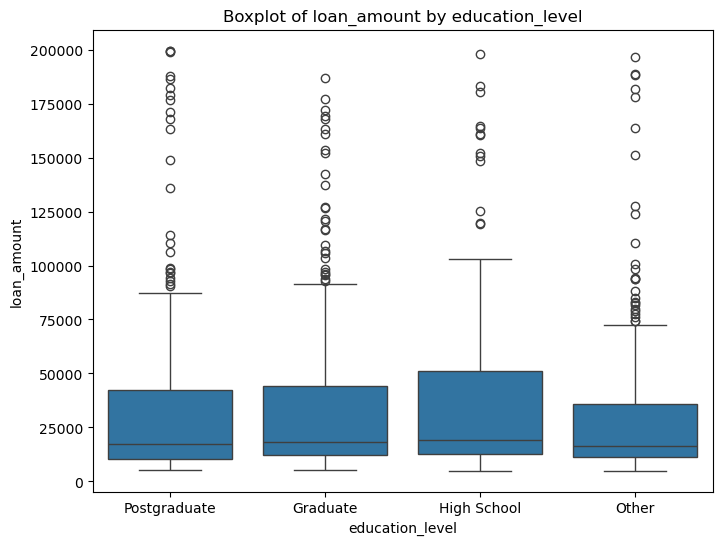

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='education_level', y='loan_amount', data=df)
plt.title('Boxplot of loan_amount by education_level')
plt.show()

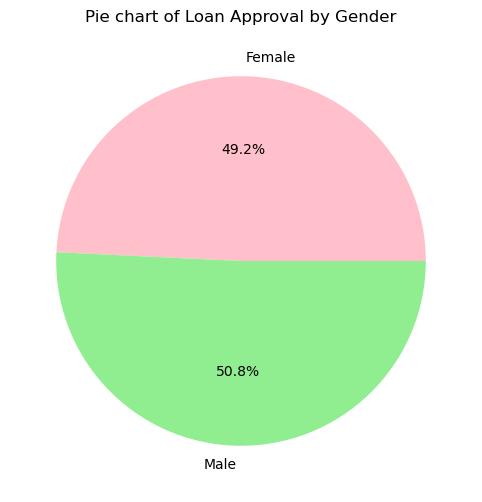

In [24]:
loan_approved = df.groupby('gender')['loan_approved'].sum()
plt.figure(figsize=(8,6))
plt.pie(loan_approved, labels=loan_approved.index, autopct='%1.1f%%', colors=['pink','lightgreen'])
plt.title('Pie chart of Loan Approval by Gender')
plt.show()

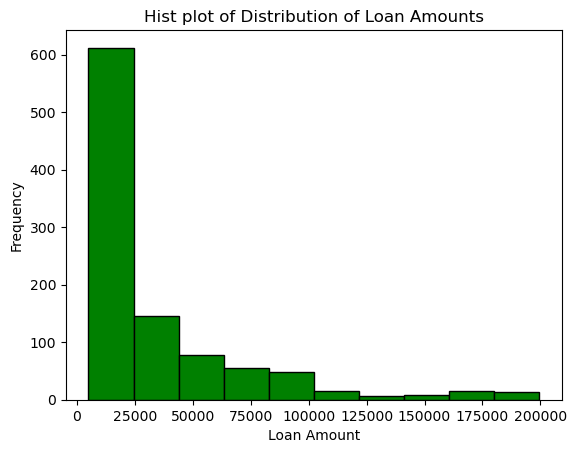

In [25]:
plt.hist(df['loan_amount'], bins=10, edgecolor='black', color='green')
plt.title('Hist plot of Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\Sandhya K\AppData\Local\Temp\ipykernel_1284\270983260.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_purpose', palette=['orange'])
C:\Users\Sandhya K\AppData\Local\Temp\ipykernel_1284\270983260.py:1: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='loan_purpose', palette=['orange'])


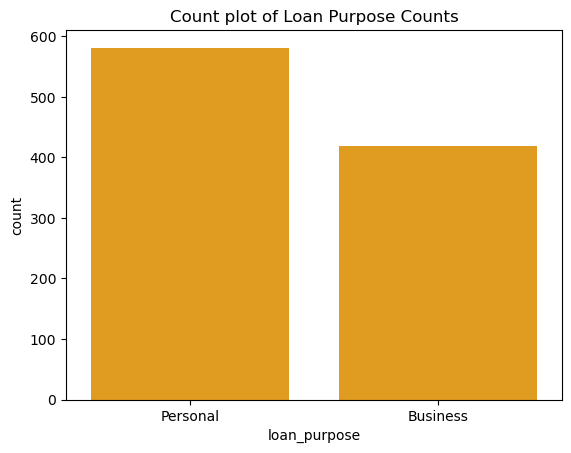

In [26]:
sns.countplot(data=df, x='loan_purpose', palette=['orange'])
plt.title('Count plot of Loan Purpose Counts')
plt.show()

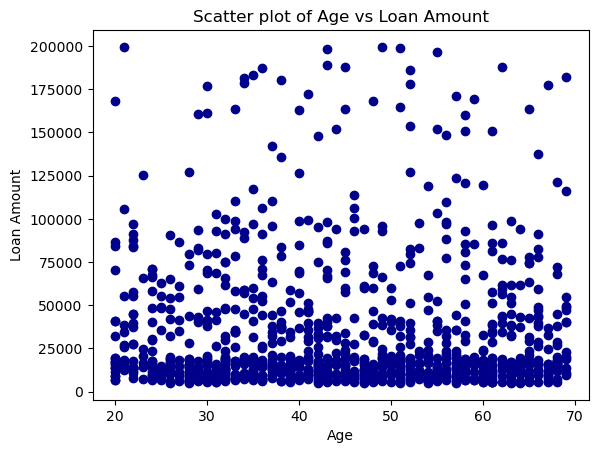

In [27]:
plt.scatter(df['age'], df['loan_amount'], color='darkblue')
plt.title('Scatter plot of Age vs Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()

C:\Users\Sandhya K\AppData\Local\Temp\ipykernel_1284\4178075324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_term', y='loan_amount',palette=['coral','lightblue'])


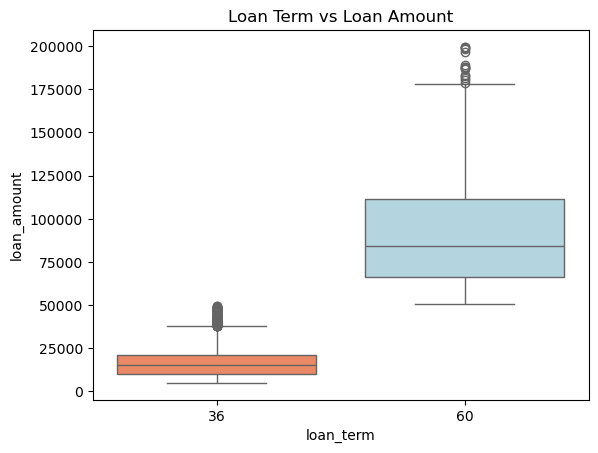

In [28]:
sns.boxplot(data=df, x='loan_term', y='loan_amount',palette=['coral','lightblue'])
plt.title('Loan Term vs Loan Amount')
plt.show()

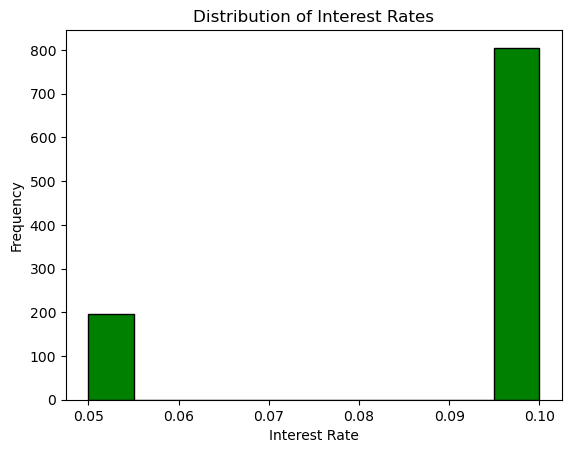

In [29]:
plt.hist(df['interest_rate'], bins=10, edgecolor='black', color='green')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

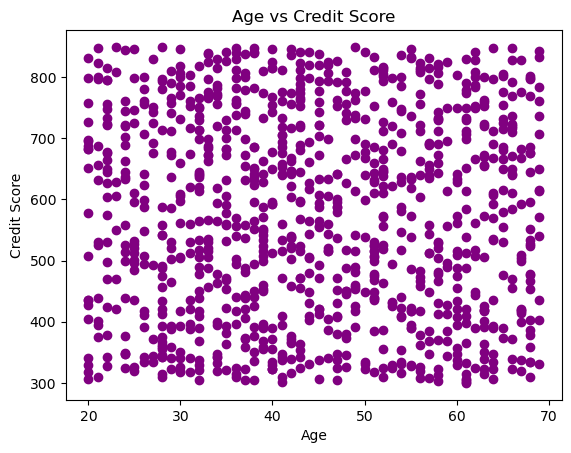

In [30]:
plt.scatter(df['age'], df['credit_score'], color='purple')
plt.title('Age vs Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

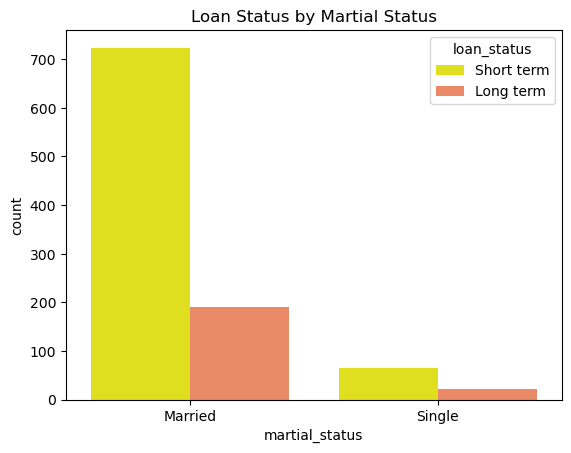

In [31]:
sns.countplot(data=df, x='martial_status', hue='loan_status', palette=['yellow','coral'])
plt.title('Loan Status by Martial Status')
plt.show()

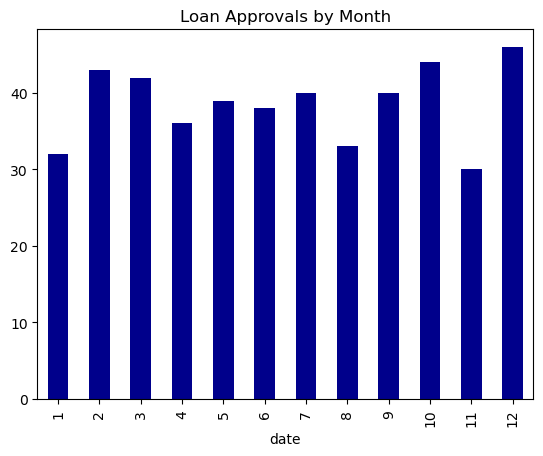

In [32]:
df['date'] = pd.to_datetime(df['date'])
df.groupby(df['date'].dt.month)['loan_approved'].sum().plot(kind='bar', color='darkblue')
plt.title('Loan Approvals by Month')
plt.show()

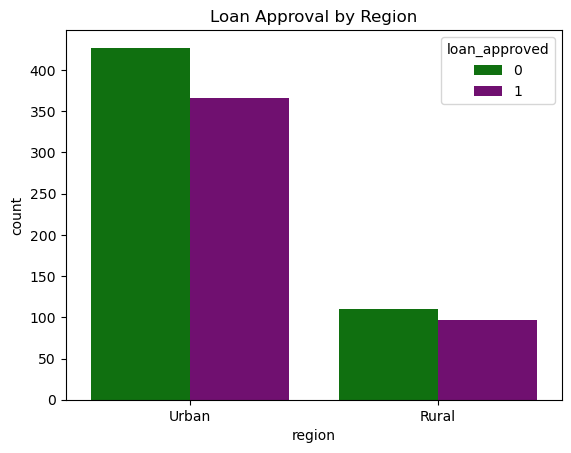

In [33]:
sns.countplot(data=df, x='region', hue='loan_approved', palette=['green','purple'])
plt.title('Loan Approval by Region')
plt.show()